# Python Code(Useable!)

Here's an example of what this program does and outputs.
<br>

![example](output_0_2.png)


Welcome! Input a file's name(must be .csv) to analyze: 1.csv
Add another file(y/n)?n
Would you like to look at spending(s) or income(i)?s
Would you like to filter out a category(y/n)?     (will repeat if you type 'y' and give an input to the next question):y
Enter the category you want to filter out:Healthcare
Would you like to filter out a category(y/n)?     (will repeat if you type 'y' and give an input to the next question):n
Would you like to set a date range(y/n)? n



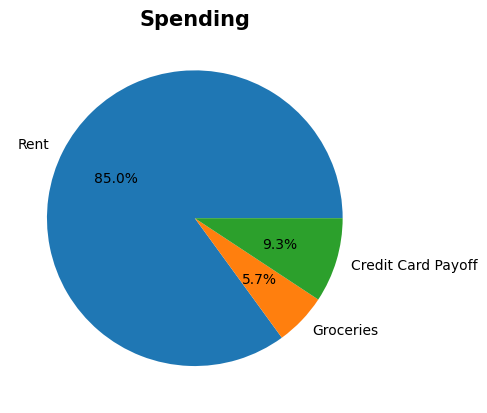

,Date,Description,Category,Amount
0,03/31/25,ACH:The Regent -Rent,Rent,300.0
1,04/04/25,TRADER JOE S #71 TRADER MADISON WI US,Groceries,83.09
2,04/05/25,Web Branch:Zelle Rishabh Dw 800-533-6773,Rent,1079.6
3,04/18/25,Web Branch:UWCU VISA PAYMENT XX-7436,Credit Card Payoff,94.64
4,04/21/25,Web Branch:UWCU VISA PAYMENT XX-7436,Credit Card Payoff,55.85
5,04/25/25,TRADER JOE S #71 TRADER MADISON WI US,Groceries,9.5
6,-,-,-,-
7,NaN,NaN,Rent,1379.6
8,NaN,NaN,Groceries,92.59
9,NaN,NaN,Credit Card Payoff,150.49


In [3]:
import csv
import pandas as pd
import datetime
import matplotlib.pyplot as plt

def process_csv(file):
    df = pd.read_csv(file) # load the .csv and converts it into a DataFrame
    df = df.iloc[:, 0:4]
    # in case the .csv has more than four columns, chop it down into four
    df = df.dropna() # this removes any extra rows in the DataFrame
    df['Amount'] = df['Amount'].astype(float)
    # casts the 'Amount' column into floats

    for cell in range(len(df['Date'])):
        current_cell = df.loc[cell, 'Date']
        # print(current_cell)
        if len(current_cell) == 5:
            current_cell = pd.to_datetime(df.loc[cell, 'Date'] + '/2025')
            # currently is hardcoded to add the year 2025 to the date
            current_cell = current_cell.strftime("%x")
            # format the dates to be MM/DD/YY
            df.loc[cell, 'Date'] = current_cell
        else:
            current_cell = pd.to_datetime(df.loc[cell, 'Date'])
            current_cell = current_cell.strftime("%x")
            df.loc[cell, 'Date'] = current_cell
    return df

def combine_slices(input_df):
    combined_data = {}
    for idx in range(len(input_df.iloc[:, 2])):
        current_category = input_df.iloc[idx, 2]
        if current_category not in combined_data:
            amount_list = 0
            combined_data[current_category] = amount_list
            # amount_list.append(pos_df.iloc[idx,3])
        for key in combined_data:
            if key == current_category:
                combined_data[current_category] += input_df.iloc[idx,3]
    merged_values = combined_data.values()
    merged_labels = combined_data.keys()
    return combined_data

new_file = input("Welcome! Input a file's name(must be .csv) to analyze: ")
current_df = process_csv(new_file)

add_new = True
while add_new:
    add_true = input("Add another file(y/n)?")
    if add_true == 'y':
        combine_df = process_csv(input("Enter a .csv file:"))
        combined_df = combine_df.merge(current_df, how = 'outer')
        current_df = combined_df.copy()
        add_true = input("Add another file(y/n)?")
    if add_true == 'n':
        add_new = False
        combined_df = current_df
current_df = combined_df
repeat = True
while repeat:
    flow = input("Would you like to look at spending(s) or income(i)?")
    if flow == "i":
        current_df = current_df[current_df['Amount'] > 0]
        repeat = False
        flow_name = "Income"
    elif flow == "s":
        current_df.loc[:, "Amount"] = -1 * current_df.loc[:, "Amount"]
        # current_df = df.reset_index()
        # current_df = current_df.iloc[:, 1:]
        current_df = current_df[current_df['Amount'] > 0]
        flow_name = "Spending"
        repeat = False
    else:
        print("Invalid input, dude!")

current_df = current_df.reset_index()
current_df = current_df.iloc[:, 1:]
filter_more_categories_valid = True
while filter_more_categories_valid == True:
    date_range_valid = input("Would you like to filter out a category(y/n)? \
    (will repeat if you type 'y' and give an input to the next question):")
    if date_range_valid == 'y':
        filtered_category = input("Enter the category you want to filter out:")
        fresh_df = []
        for cell in range(len(current_df)):
            if current_df.loc[cell, 'Category'] != filtered_category:
                current_cell = current_df.loc[cell, 'Category']
                fresh_df.append(current_df.loc[cell])
        fresh_df = pd.DataFrame(fresh_df)
        continue
        current_df = fresh_df
    elif date_range_valid == 'n':
        filter_more_categories_valid = False
    else:
        print("Invalid input!")
        continue
current_df = fresh_df
current_df = pd.DataFrame(current_df)
current_df = current_df.reset_index()
current_df = current_df.iloc[:, 1:]
date_range_valid = False
while date_range_valid == False:
    date_range_valid = input("Would you like to set a date range(y/n)? ")
    if date_range_valid == 'y':

        min_date = input('Enter the minimum date you want to filter your \
        data(MM/DD/YYYY):')
        max_date = input('Enter the maximum date you want to filter your \
        data(MM/DD/YYYY:')

        max_date = pd.to_datetime(max_date)
        min_date = pd.to_datetime(min_date)

        current_df = current_df[min_date <= pd.to_datetime(current_df['Date'], \
                                                           format = 'mixed')]
        current_df = current_df[max_date >= pd.to_datetime(current_df['Date'], \
                                                           format = 'mixed')]

dict_here = combine_slices(current_df)
print()
plt.pie(dict_here.values(), labels=dict_here.keys(), autopct='%1.1f%%')
plt.title(flow_name, fontsize=15, fontweight='bold')
plt.show()
print()
empty_df_for_format = pd.DataFrame({
    "Amount": ['-'],
    "Category": ['-'],
    "Description": ['-'],
    "Date": ['-']
})

summed_df = pd.DataFrame({
    "Category": dict_here.keys(),
    "Amount": dict_here.values()
})

df_list = [current_df,empty_df_for_format,  summed_df]

current_df = pd.concat(df_list)
current_df = current_df.reset_index()
current_df = current_df.iloc[:, 1:]
current_df